## Задача

- Выбрать данные для ML, выбрать ML модель, сформулировать конечную цель для модели
- Сбор данных
    - Определить источники данных (открытые данные, базы данных, API, парсинг сайтов).
    - Собрать данные в нужном формате и объеме.
    - Оценить доступность, релевантность, полноту и достоверность данных.
- Подготовка данных (Data Preparation)
    - Очистка данных
      - Обработка пропущенных значений (заполнение, удаление)
      - Обработка выбросов (удаление, замена).
      -  Удаление дубликатов.
    - Преобразование данных
      - Масштабирование признаков (нормализация, стандартизация)
      - Кодирование категориальных признаков (one-hot encoding, label encoding)
- Выбор признаков
      - Удаление неинформативных признаков.
      - Генерация новых признаков на основе существующих
- Разбиение данных: Разделение на обучающую, валидационную и тестовую выборки.
- Выбор модели (Model Selection)
     - Исследовать различные алгоритмы, подходящие для данной задачи.
     - Провести предварительные эксперименты с разными моделями.
     - Выбрать наиболее перспективный алгоритм, основываясь на результатах экспериментов.
- Обучение модели (Model Training)
     - Подать подготовленные данные на вход модели.
     - Настроить гиперпараметры модели (параметры, которые не обучаются на данных, а задаются заранее).
     - Контролировать процесс обучения, чтобы избежать переобучения или недообучения.
- Оценка качества модели (Model Evaluation)
    - Выбрать метрики качества, релевантные для данной задачи (например, точность, полнота, F-мера для классификации; MSE, RMSE, R^2 для регрессии).
    - Оценить качество модели на тестовой выборке (данные, которые модель не видела во время обучения).
    - Проанализировать ошибки модели и найти способы ее улучшения.
- Проанализировать результат

#### Выбрать данные для ML, выбрать ML модель, сформулировать конечную цель для модели
В качестве набора данных был выбран датасет с ноутбуками https://www.kaggle.com/datasets/asinow/laptop-price-dataset
Так как мы будем предсказывать стоимость ноутбуков по их характеристикам, поэтому мы рассмотрим две модели: линейную регрессию и дерево решений, чтобы определить, какая из моделей лучше подойдет для наших целей.
В результате модель должна предсказывать стоимость ноутбука в зависимости от требуемых характеристик

### Сбор данных
- датасет с ноутбуками https://www.kaggle.com/datasets/asinow/laptop-price-dataset
- данные полны, релевантны

In [3]:
import pandas as pd

df = pd.read_csv('laptop_prices.csv')
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


### Подготовка данных

In [2]:
import pandas as pd

df = pd.read_csv('laptop_prices.csv')
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


##### Анализ уникальности значений, типов, отсутствующих значенийв столбцах

Рассмотрим уникальные значения по разным столбцам.
- Столбец: *Brand*
  - Тип: object
  - ['Apple' 'Razer' 'Asus' 'Lenovo' 'Acer' 'Dell' 'Microsoft' 'HP' 'Samsung' 'MSI']
  - Выбросов нет, повторяющихся значений нет.
  - **Требуется кодировка категориального признака**
- Столбец: *Processor*
  - Тип: object
  - ['AMD Ryzen 3' 'AMD Ryzen 7' 'Intel i5' 'Intel i3' 'AMD Ryzen 9' 'AMD Ryzen 5' 'Intel i9' 'Intel i7']
  - Выбросов нет, повторяющихся значений нет.
  - **Требуется кодировка категориального признака**
- Столбец: *RAM (GB)*
  - Тип: int64
  - [64  4 32  8 16]
  - Выбросов нет, повторяющихся значений нет.
  - Преобразований не требуется
- Столбец: *Storage*
  - Тип: object
  - ['512GB SSD' '1TB SSD' '2TB SSD' '256GB SSD' '1TB HDD']
  - Выбросов нет, повторяющихся значений нет.
  - **Требуется кодировка категориального признака**
- Столбец: *GPU*
  - Тип: object
  - ['Nvidia GTX 1650' 'Nvidia RTX 3080' 'Nvidia RTX 3060' 'AMD Radeon RX 6600' 'Nvidia RTX 2060' 'AMD Radeon RX 6800' 'Integrated']
  - Выбросов нет, повторяющихся значений нет
  - **Требуется кодировка категориального признака**
- Столбец: *Screen Size (inch)*
  - Тип: float64
  - [17.3 14.  13.3 16.  15.6]
  - Выбросов нет, повторяющихся значений нет
  - Преобразований не требуется
- Столбец: *Resolution*
  - Тип: object
  - ['2560x1440' '1366x768' '3840x2160' '1920x1080']
  - Выбросов нет, повторяющихся значений нет
  - **Требуется кодировка категориального признака**
- Столбец: *Battery Life (hours)*
  - Тип: float64
  - [ 8.9  9.4  8.5 10.5  5.7  7.1  9.1  9.8 11.5  7.5  6.4  8.3  9.3 10.9 11.8  7.8 11.6 10. ...]
  - Выбросов нет, повторяющихся значений нет
  - Преобразований не требуется
- Столбец: *Weight (kg)*
  - Тип: float64
  - [1.42 2.57 1.74 3.1  3.38 1.85 1.98 1.26 1.48 2.19 2.53 1.21 2.97 2.02]
  - Выбросов нет, повторяющихся значений нет
  - Преобразований не требуется
- Столбец: *Operating System*
  - Тип: object
  - ['FreeDOS' 'Linux' 'Windows' 'macOS']
  - Выбросов нет, повторяющихся значений нет
  - **Требуется кодировка категориального признака**
- Столбец: *Price ($)*
  - Тип: float64
  - [3997.07 1355.78 2673.07 ... 2789.46 1067.13 1579.55]
  - Так как можно изменить тип на другой числовой, то текстовых значений нет.
  - Преобразований не требуется

Таким образом:
- Пропущенных значений нет
- Требуется перекодировать категориальные признаки (неправильного ввода и повторов нет)

In [3]:
for i in df.columns:
    print('Столбец: ',i)
    print('Уникальные значения: ',df[i].unique())
    print('Количество пропущенных значений', df[i].isnull().sum())
    print('Тип столбца', df[i].dtype)
    if df[i].dtype == 'object':
        print('Категориальный признак требует перекодировки')
    else:
        print('Числовой признак')
    print('-------------------------------')

catcol = [i for i in df.columns if df[i].dtype == 'object']
numcol = [i for i in df.columns if df[i].dtype != 'object']
print('Категориальные признаки',catcol)
print('Числовые признаки', numcol)

Столбец:  Brand
Уникальные значения:  ['Apple' 'Razer' 'Asus' 'Lenovo' 'Acer' 'Dell' 'Microsoft' 'HP' 'Samsung'
 'MSI']
Количество пропущенных значений 0
Тип столбца object
Категориальный признак требует перекодировки
-------------------------------
Столбец:  Processor
Уникальные значения:  ['AMD Ryzen 3' 'AMD Ryzen 7' 'Intel i5' 'Intel i3' 'AMD Ryzen 9'
 'AMD Ryzen 5' 'Intel i9' 'Intel i7']
Количество пропущенных значений 0
Тип столбца object
Категориальный признак требует перекодировки
-------------------------------
Столбец:  RAM (GB)
Уникальные значения:  [64  4 32  8 16]
Количество пропущенных значений 0
Тип столбца int64
Числовой признак
-------------------------------
Столбец:  Storage
Уникальные значения:  ['512GB SSD' '1TB SSD' '2TB SSD' '256GB SSD' '1TB HDD']
Количество пропущенных значений 0
Тип столбца object
Категориальный признак требует перекодировки
-------------------------------
Столбец:  GPU
Уникальные значения:  ['Nvidia GTX 1650' 'Nvidia RTX 3080' 'Nvidia RTX 3060'

### Выбор признаков
##### Преобразование категориальных признаков и построение heat-map
Было 11 признаков, стало 43. Будем надеяться, это не сильно плохо скажется на модели.
На корреляционной матрице видно, то сильно коррелированных признаков нет, разве что память RAM, но она, вроде, и в реальной жизни сильно на цену влияет.

In [10]:
#Нормализуем признаки z-нормализацией
for i in numcol:
    mean_df = df[i].mean()
    std_df = df[i].std()
    df[i] = df[i].apply(lambda x: (x - mean_df)/std_df)
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,1.798831,512GB SSD,Nvidia GTX 1650,1.452819,2560x1440,0.378305,-1.379081,FreeDOS,1.377111
1,Razer,AMD Ryzen 7,-0.958197,1TB SSD,Nvidia RTX 3080,-0.843638,1366x768,0.595187,0.342681,Linux,-0.628598
2,Asus,Intel i5,0.328416,2TB SSD,Nvidia RTX 3060,-1.330765,3840x2160,0.204799,-0.899982,FreeDOS,0.371709
3,Lenovo,Intel i5,-0.958197,256GB SSD,Nvidia RTX 3080,-1.330765,1366x768,1.072328,1.136188,Windows,-1.087719
4,Razer,Intel i3,-0.958197,256GB SSD,AMD Radeon RX 6600,0.548154,3840x2160,-1.009740,1.555399,Linux,-0.093965
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,-0.958197,2TB SSD,Nvidia RTX 2060,1.452819,1366x768,1.506092,-1.139531,macOS,-1.122915
11764,Asus,Intel i3,-0.958197,2TB SSD,AMD Radeon RX 6800,0.548154,1366x768,0.638564,-0.301108,Linux,-1.069175
11765,Razer,AMD Ryzen 9,-0.958197,2TB SSD,AMD Radeon RX 6600,0.269796,2560x1440,0.074670,-0.435855,Linux,0.460092
11766,Samsung,AMD Ryzen 7,-0.406791,512GB SSD,Integrated,-1.330765,1920x1080,-0.228965,-1.289250,macOS,-0.847789


In [11]:
from sklearn import preprocessing

df_encod = pd.get_dummies(df, columns=catcol, dtype=int)
df_encod.head()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Razer,Brand_Samsung,Processor_AMD Ryzen 3,Processor_AMD Ryzen 5,Processor_AMD Ryzen 7,Processor_AMD Ryzen 9,Processor_Intel i3,Processor_Intel i5,Processor_Intel i7,Processor_Intel i9,Storage_1TB HDD,Storage_1TB SSD,Storage_256GB SSD,Storage_2TB SSD,Storage_512GB SSD,GPU_AMD Radeon RX 6600,GPU_AMD Radeon RX 6800,GPU_Integrated,GPU_Nvidia GTX 1650,GPU_Nvidia RTX 2060,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080,Resolution_1366x768,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160,Operating System_FreeDOS,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,1.798831,1.452819,0.378305,-1.379081,1.377111,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
1,-0.958197,-0.843638,0.595187,0.342681,-0.628598,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,0.328416,-1.330765,0.204799,-0.899982,0.371709,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,-0.958197,-1.330765,1.072328,1.136188,-1.087719,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
4,-0.958197,0.548154,-1.009740,1.555399,-0.093965,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


<Axes: >

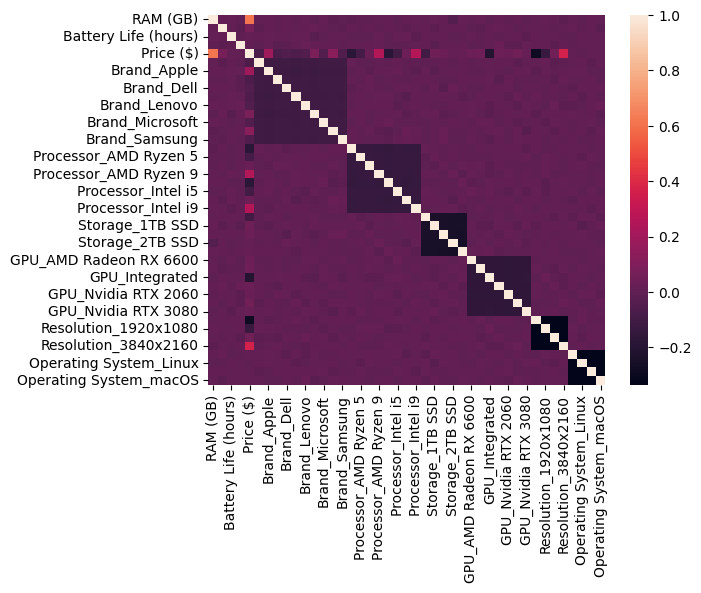

In [12]:
import seaborn as sns
sns.heatmap(df_encod.corr())

### Разбиение данных

In [13]:
from sklearn.model_selection import train_test_split

X = df_encod.drop('Price ($)', axis=1)
y = df_encod['Price ($)']

#Деление на тренировочную и тестовую выборку
Xtr_f, Xt, ytr_f, yt = train_test_split(X,y,test_size=0.3,random_state=42)

#Выделение из тестовой выборки валидационной выборки
Xtr, Xval, ytr, yval = train_test_split(Xtr_f,ytr_f,test_size=0.3,random_state=0)

### Выбор модели

##### Линейная регрессия или решающее дерево?

Вывод: Регуляризации сильно не влияют в данном случае, точно модели 88%. Дерево решений дает лучший результат (93%), попробуем настроить гиперпараметры.

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

models = {'linreg':LinearRegression(),
          'ridge':Ridge(alpha = 0.1),
          'lasso':Lasso(alpha = 0.1),
          'tree':DecisionTreeRegressor(random_state=0)}

def make_model(models,Xtr,ytr,Xt,yt):
    for i in models.keys():
        model = models[i]
        model.fit(Xtr,ytr)
        yp = model.predict(Xt)
        mse = mean_squared_error(yt,yp)
        r2 = r2_score(yt,yp)
        print(f'{models[i]}\nMSE:{round(mse,2):>12}\nRMSE:{round(mse ** .5,2):>11}\nR2: {round(r2,6):>12}\n------------------')

make_model(models,Xtr,ytr,Xt,yt)

LinearRegression()
MSE:        0.12
RMSE:       0.35
R2:     0.880165
------------------
Ridge(alpha=0.1)
MSE:        0.12
RMSE:       0.35
R2:     0.880162
------------------
Lasso(alpha=0.1)
MSE:        0.57
RMSE:       0.76
R2:     0.449779
------------------
DecisionTreeRegressor(random_state=0)
MSE:        0.07
RMSE:       0.27
R2:      0.92975
------------------


##### Подбор гиперпараметров для дерева

In [15]:
models_tree = {'tree5':DecisionTreeRegressor(max_depth = 5, random_state=0),
               'tree8':DecisionTreeRegressor(max_depth = 8, random_state=0),
               'tree10':DecisionTreeRegressor(max_depth = 10, random_state=0),
               'tree13':DecisionTreeRegressor(max_depth = 13, random_state=0),
               'tree15':DecisionTreeRegressor(max_depth = 15, random_state=0), #Лучшая модель
               'tree20':DecisionTreeRegressor(max_depth = 20, random_state=0),
               'tree25':DecisionTreeRegressor(max_depth = 25, random_state=0)}

make_model(models_tree,Xtr,ytr,Xval,yval)

DecisionTreeRegressor(max_depth=5, random_state=0)
MSE:        0.26
RMSE:       0.51
R2:     0.746914
------------------
DecisionTreeRegressor(max_depth=8, random_state=0)
MSE:        0.14
RMSE:       0.38
R2:     0.861418
------------------
DecisionTreeRegressor(max_depth=10, random_state=0)
MSE:         0.1
RMSE:       0.32
R2:     0.900584
------------------
DecisionTreeRegressor(max_depth=13, random_state=0)
MSE:        0.08
RMSE:       0.28
R2:      0.92389
------------------
DecisionTreeRegressor(max_depth=15, random_state=0)
MSE:        0.07
RMSE:       0.27
R2:     0.929471
------------------
DecisionTreeRegressor(max_depth=20, random_state=0)
MSE:        0.07
RMSE:       0.27
R2:     0.928252
------------------
DecisionTreeRegressor(max_depth=25, random_state=0)
MSE:        0.07
RMSE:       0.27
R2:     0.929326
------------------


##### Проверим финальную модель на тестовых данных и на тренировочных данных

Считаю, что 96% на тестовых данных - приемлемая точность для данной задачи

In [18]:
final_tree = DecisionTreeRegressor(max_depth = 15, random_state=0)
final_tree.fit(Xtr_f,ytr_f)
yp_test = final_tree.predict(Xt)
yp_tren = final_tree.predict(Xtr_f)

mse = mean_squared_error(yt,yp_test)
r2 = r2_score(yt,yp_test)
print(f'Test {final_tree}\nMSE:{round(mse,2):>12}\nRMSE:{round(mse ** .5,2):>11}\nR2: {round(r2,6):>12}\n------------------')

mse = mean_squared_error(ytr_f,yp_tren)
r2 = r2_score(ytr_f,yp_tren)
print(f'Train {final_tree}\nMSE:{round(mse,2):>12}\nRMSE:{round(mse ** .5,2):>11}\nR2: {round(r2,6):>12}\n------------------')

Test DecisionTreeRegressor(max_depth=15, random_state=0)
MSE:        0.04
RMSE:       0.21
R2:      0.95946
------------------
Train DecisionTreeRegressor(max_depth=15, random_state=0)
MSE:         0.0
RMSE:       0.06
R2:     0.995895
------------------


### Проанализировать результат

Таки образом, для предсказания цены ноутбука лучше всего подходит дерево решений. Точность предсказаний - 96%.